Exactitud (Accuracy): 0.9342
Precisión (Precision): 1.0000
Recuperación (Recall): 0.8214


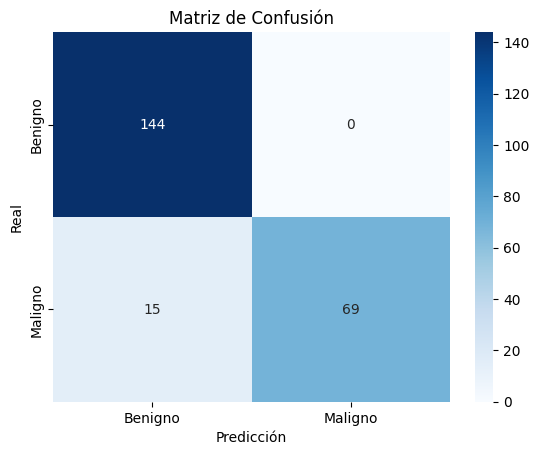

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, preprocessing

# Cargar datos
data = load_breast_cancer()
X = data['data']
Y = 1 - data['target']  # 0 = 'benign' y 1 = malignant.

# Dividir el conjunto de datos en capacitación y pruebas.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1234)

# Normalizar los datos
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir y entrenar el modelo KNN con k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

# Hacer predicciones
Y_pred = knn.predict(X_test)

# Calcular métricas
accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)

# Imprimir resultados
print(f'Exactitud (Accuracy): {accuracy:.4f}')
print(f'Precisión (Precision): {precision:.4f}')
print(f'Recuperación (Recall): {recall:.4f}')

# Matriz de confusión
conf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()